In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import csv

In [13]:
padlong = pd.read_csv("PAD.Long.2021.csv")

l = ["R1", "R2", "R3", "R4"]
padlong = padlong[padlong['FY2021.AV'].notna()]
padlong = padlong[padlong['FY2021.LU'].isin(l)]

padlong.drop(
    padlong.columns.difference(
        ['PID', 'CM_ID', 'ST_NAME', 'ST_NUM', 'ZIPCODE', 'FY2021.LU', 'FY2021.AV', 'DiffAV2021', 'X', 'Y', 'Blk_ID_10' ]
        ), 1, inplace=True)
padlong.rename(columns={'X': 'longitude', 'Y': 'latitude'}, inplace=True)
padlong["Address"] = padlong['ST_NUM'] + ' ' + padlong['ST_NAME']
#padlong[['X', 'Y']] = padlong[['X', 'Y']].round(5)
padlong['price_bracket'] = padlong['FY2021.AV'].apply(
    lambda x: '$1000000+' if len(str(x)) >= 9
    else '$'+str(int(round(x,-5))) + '-' + str(int(round(x,-5) + 100000)) if round(x,-5) < (round(x,-4))
    else '$'+str(int(round(x,-5) - 100000)) + '-' + str(int(round(x,-5))) if round(x,-5) > (round(x,-4)) 
    else None)

padlong['rent_price'] = padlong['FY2021.AV'] * 0.01
padlong['rent_bracket'] = padlong['rent_price'].apply(
    lambda x: '$10000+' if len(str(x)) >= 7
    else '$'+str(int(round(x,-3))) + '-' + str(int(round(x,-3) + 1000)) if round(x,-3) < (round(x,-2))
    else '$'+str(int(round(x,-3) - 1000)) + '-' + str(int(round(x,-3))) if round(x,-3) > (round(x,-2)) 
    else None)

padlong.head(10)



C:\Users\david\AppData\Local\Temp\ipykernel_16360\2482782554.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  padlong.drop(


,PID,CM_ID,ST_NUM,ST_NAME,ZIPCODE,FY2021.LU,FY2021.AV,DiffAV2021,longitude,latitude,Blk_ID_10,Address,price_bracket,rent_price,rent_bracket
30,100001000,100153000.0,104 A 104,PUTNAM ST,2128.0,R3,719400.0,113900.0,-71.032588,42.379394,2.502505e+14,104 A 104 PUTNAM ST,$700000-800000,7194.0,$7000-8000
41,1000018000,NaN,1,WORTHINGTON ST,2120.0,R1,835700.0,102200.0,-71.102243,42.333737,2.502508e+14,1 WORTHINGTON ST,$800000-900000,8357.0,$8000-9000
42,1000019000,NaN,3,WORTHINGTON ST,2120.0,R1,854300.0,40300.0,-71.102211,42.333788,2.502508e+14,3 WORTHINGTON ST,$800000-900000,8543.0,$8000-9000
43,100002000,100153000.0,197,LEXINGTON ST,2128.0,R3,744800.0,77100.0,-71.032522,42.379421,2.502505e+14,197 LEXINGTON ST,$700000-800000,7448.0,$7000-8000
44,1000020000,NaN,5,WORTHINGTON ST,2120.0,R1,821500.0,37800.0,-71.102183,42.333832,2.502508e+14,5 WORTHINGTON ST,$800000-900000,8215.0,$8000-9000
45,1000021000,NaN,7,WORTHINGTON ST,2120.0,R2,964900.0,61200.0,-71.102156,42.333877,2.502508e+14,7 WORTHINGTON ST,$900000-1000000,9649.0,$9000-10000
46,1000022000,NaN,9,WORTHINGTON ST,2120.0,R3,1011500.0,76400.0,-71.102127,42.333922,2.502508e+14,9 WORTHINGTON ST,$1000000+,10115.0,$10000+
47,1000023000,NaN,11,WORTHINGTON ST,2120.0,R1,879800.0,15300.0,-71.102100,42.333967,2.502508e+14,11 WORTHINGTON ST,$800000-900000,8798.0,$8000-9000
48,1000024000,NaN,13,WORTHINGTON ST,2120.0,R1,953200.0,47300.0,-71.102072,42.334012,2.502508e+14,13 WORTHINGTON ST,$900000-1000000,9532.0,$9000-10000
49,1000025000,NaN,15,WORTHINGTON ST,2120.0,R3,1180200.0,128500.0,-71.102043,42.334057,2.502508e+14,15 WORTHINGTON ST,$1000000+,11802.0,$10000+


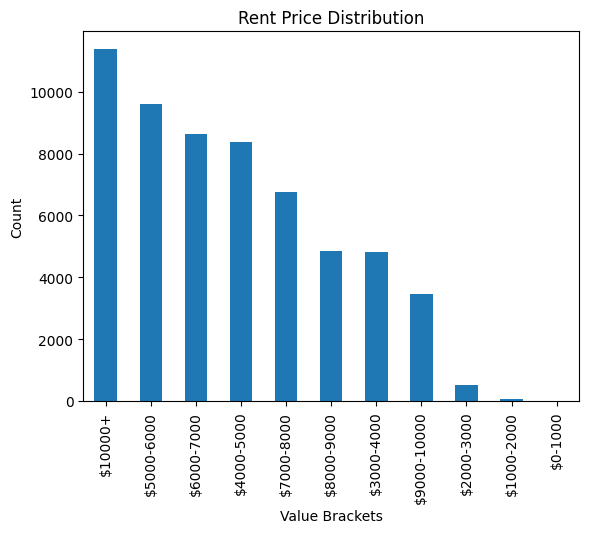

In [14]:
padlong['rent_bracket'].value_counts().plot.bar()
plt.title("Rent Price Distribution")
plt.xlabel("Value Brackets")
plt.ylabel("Count")
plt.show()